 ## Business Case  :   Improving Lead Quality with Machine Learning at FicZon Inc

In [2]:
import os
import mysql.connector
# Importing  Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore') 

In [3]:
connection = mysql.connector.connect(
    host='18.136.157.135',
    user='dm_team2',
    password='DM!$Team&27@9!20!' 
)


In [4]:
## Check the number of databases available on the server
cursor=connection.cursor()
cursor.execute('show databases')
for i in cursor:
    print(i)

('information_schema',)
('project_sales',)


In [5]:
## connecting the databasefdgv
connection=mysql.connector.connect(host='18.136.157.135',
                                     user='dm_team2',
                                  password='DM!$Team&27@9!20!',
                                  database='project_sales')

In [6]:
# show the table
db_tables=pd.read_sql_query('show tables',connection)
print(db_tables)

  Tables_in_project_sales
0                    data


In [7]:
df=pd.read_sql_query("select * from data",connection)
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry


In [8]:
df.columns

Index(['Created', 'Product_ID', 'Source', 'Mobile', 'EMAIL', 'Sales_Agent',
       'Location', 'Delivery_Mode', 'Status'],
      dtype='object')

##  Domain analysis

- CREATED :	The date and time the lead or entry was created (e.g., when the person filled the form or signed up).
- PRODUCT_ID : The ID of the product the lead is interested in. Helps identify what product they're asking about.
- SOURCE : How the lead found you (e.g., Website, Google Ads, Email Campaign, Referral).
- MOBILE : The phone number of the lead or customer.
- EMAIL : The email address of the lead. Used for communication and identification.
- SALES_AGENT :	The name or ID of the sales person assigned to follow up with the lead.
- LOCATION : The geographic location of the lead (could be city, region, or country).
- DELIVERY_MODE : How the product or service will be delivered (e.g., Online, In-Person, Shipping).
- STATUS	: The current stage of the lead (e.g., CONVERTED, Junk Lead, In Progress, Not Responding).

## BASIC CHECKS

In [9]:
df.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [10]:
df.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [11]:
df.shape

(7422, 9)

- row index 7422 and columns 9 in a dataset

In [12]:
df.dtypes

Created          object
Product_ID       object
Source           object
Mobile           object
EMAIL            object
Sales_Agent      object
Location         object
Delivery_Mode    object
Status           object
dtype: object

In [13]:
df.describe().T

,count,unique,top,freq
Created,7422,6752,26-09-2018 11:30,4
Product_ID,7422,30,18,1711
Source,7422,26,Call,2547
Mobile,7422,487,,1810
EMAIL,7422,883,#VALUE!,1701
Sales_Agent,7422,13,Sales-Agent-4,1500
Location,7422,18,Other Locations,2500
Delivery_Mode,7422,5,Mode-5,2975
Status,7422,11,Junk Lead,1536


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


## Checking the missing value

In [15]:
df.isnull().sum()

Created          0
Product_ID       0
Source           0
Mobile           0
EMAIL            0
Sales_Agent      0
Location         0
Delivery_Mode    0
Status           0
dtype: int64

In [16]:
(df == "").sum()

Created             0
Product_ID         58
Source             17
Mobile           1810
EMAIL               0
Sales_Agent        23
Location           58
Delivery_Mode       0
Status              0
dtype: int64

- Some columns in the dataset contain missing values

In [17]:
df.replace('', pd.NA, inplace=True)

In [18]:
# Fill missing values with mode (most frequent value) for each column
df["Product_ID"].fillna(df["Product_ID"].mode()[0], inplace=True)
df['Source'].fillna(df['Source'].mode()[0], inplace=True)
df['Sales_Agent'].fillna(df['Sales_Agent'].mode()[0], inplace=True)
df['Location'].fillna(df['Location'].mode()[0], inplace=True)

In [19]:
# target
df["Status"].value_counts()

Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64

- The dataset contains two entries for the same status, 'CONVERTED' and 'converted

In [20]:
df['Status'] = df['Status'].str.upper()
df["Status"].value_counts()

Status
JUNK LEAD               1536
NOT RESPONDING          1129
CONVERTED                852
JUST ENQUIRY             760
POTENTIAL                708
LONG TERM                646
IN PROGRESS POSITIVE     643
IN PROGRESS NEGATIVE     626
LOST                     440
OPEN                      82
Name: count, dtype: int64

# Exploratory Data Analysis (EDA)

# Univariate  
- Analysing the single variable /columns and features
- Check the distribution  of each columns

## PRODUCT_ID

<Axes: xlabel='Product_ID', ylabel='Count'>

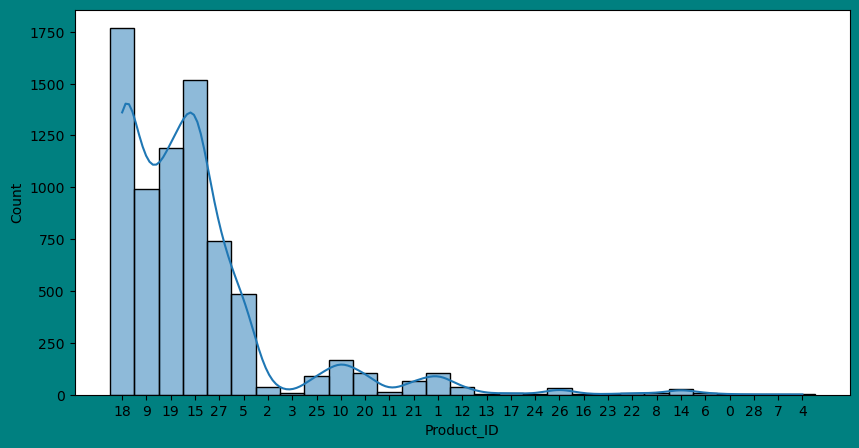

In [21]:
## Product_ID
plt.figure(figsize=(10,5),facecolor="#008080")
sns.histplot(x=df.Product_ID,kde=True)

- The distribution is right-skewed, meaning a few product IDs are extremely popular, while most are rare.
- Product IDs 18, 19, 15 dominate in frequency.

## Source

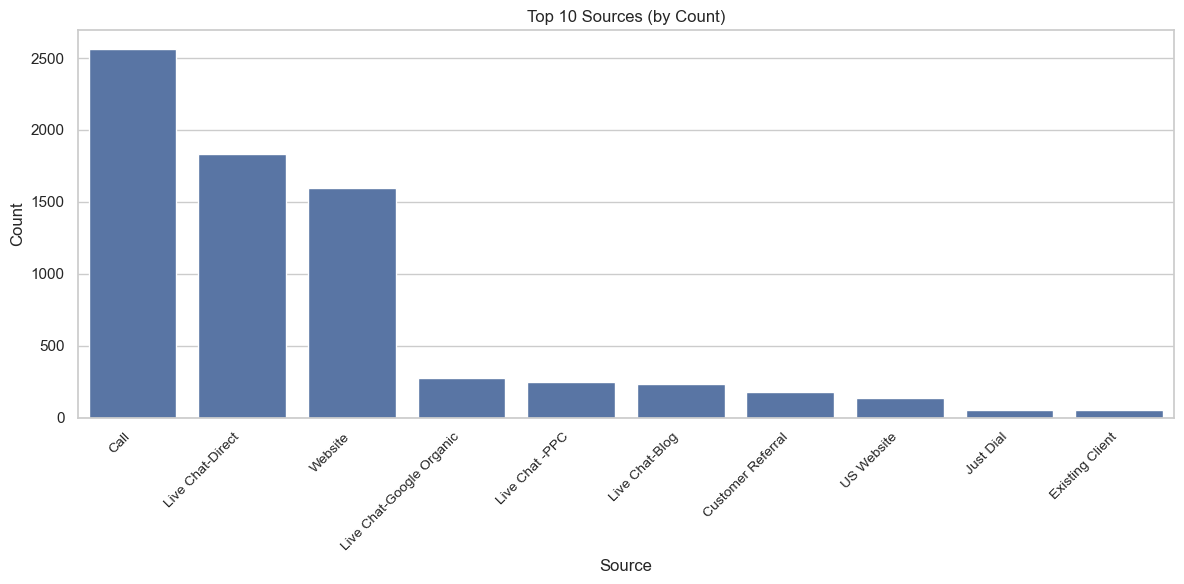

In [22]:
## source
top_sources = df['Source'].value_counts().head(10).index
df_top = df[df['Source'].isin(top_sources)]
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_top, x='Source', order=top_sources)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Top 10 Sources (by Count)')
plt.xlabel('Source')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


- Call is the top lead source means most people are reaching out by phone. They may want quick answers or feel more comfortable talking.

- "Live Chat - Direct and Website" are doing well. Many people are using your website and chat feature, which shows they are helpful.

- "Google Organic and PPC" bring some leads. People are finding you through Google search and ads, but these can be improved to bring more.

## Sales_Agent

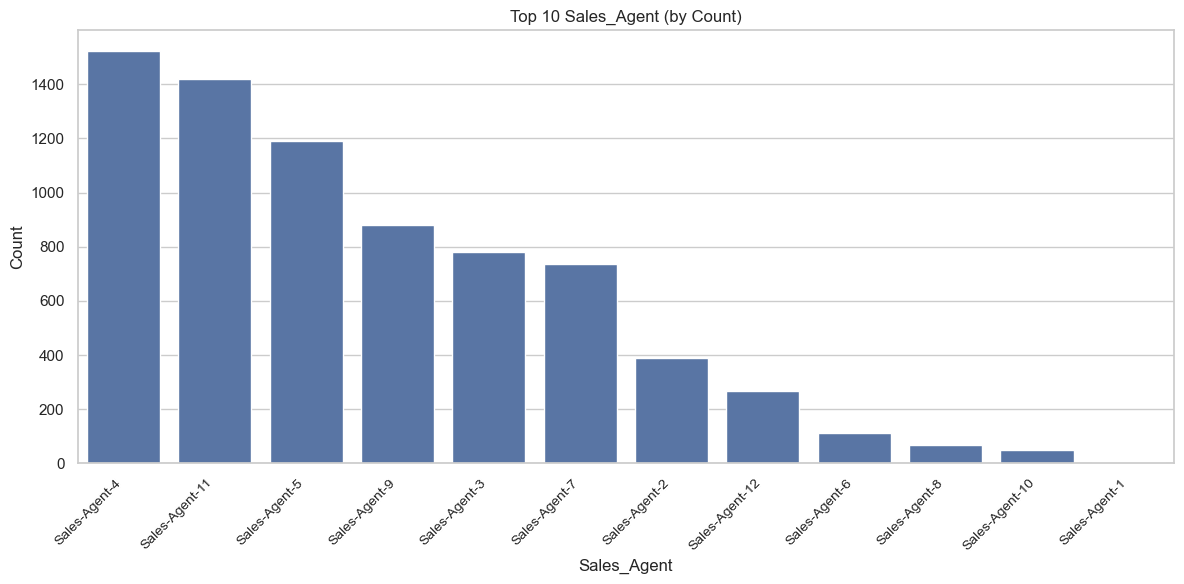

In [23]:
## Sales_Agent
top_agent= df['Sales_Agent'].value_counts().index
df_top = df[df['Sales_Agent'].isin(top_agent)]
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")
ax = sns.countplot(data=df_top, x='Sales_Agent', order=top_agent)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.title('Top 10 Sales_Agent (by Count)')
plt.xlabel('Sales_Agent')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

- Sales-Agent-14 is the top performer with the highest count, followed closely by Sales-Agent-11 and Sales-Agent-5.
- The performance drops gradually from Sales-Agent-9 down to Sales-Agent-1, who has the lowest count among the top 10.
- Top 3 agents (14, 11, 5) are driving a significant portion of the sales.

## Delivery_Mode

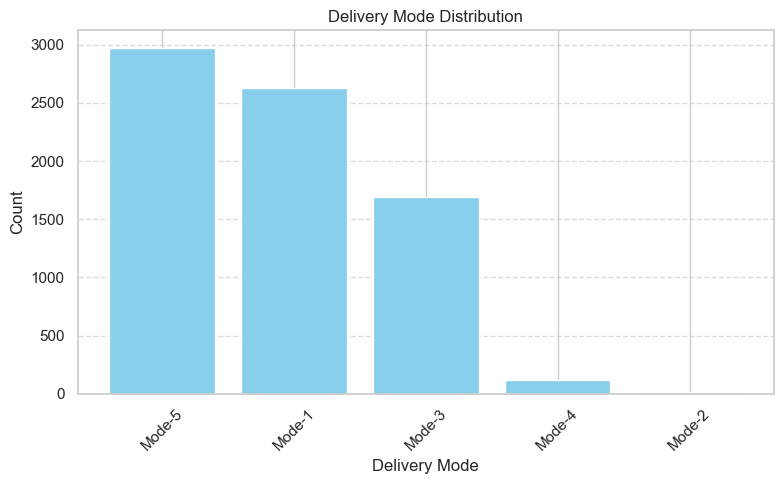

In [24]:
## Delivery_Mode
delivery_counts = df["Delivery_Mode"].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(delivery_counts.index, delivery_counts.values, color='skyblue')
plt.title("Delivery Mode Distribution")
plt.xlabel("Delivery Mode")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- Mode-5 is the most used delivery mode, followed by Mode-1, while Mode-3 is moderate, and Modes 4 and 2 are rarely used.

## Status

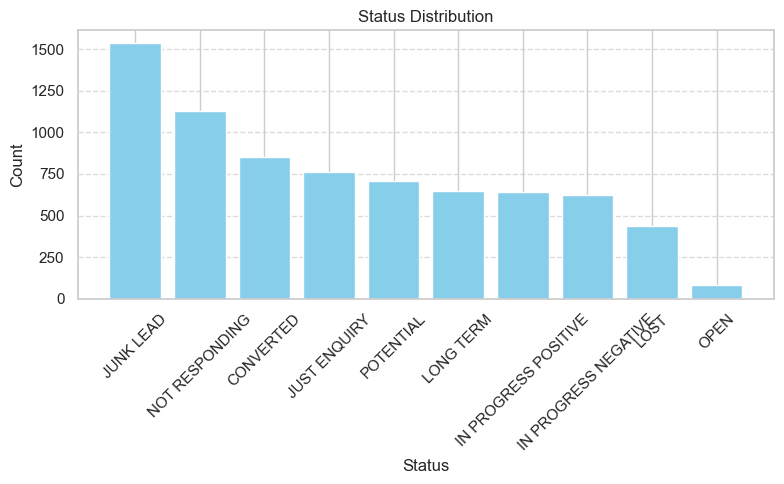

In [25]:
## Status
Status_counts = df["Status"].value_counts()
plt.figure(figsize=(8, 5))
plt.bar(Status_counts.index, Status_counts.values, color='skyblue')
plt.title("Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=45)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- "Junk Lead" is the most frequent status with over 1500 entries — this suggests a high number of unqualified leads.

 - "Not Responding" is also high (~1100 leads), indicating potential issues in follow-up or outreach effectiveness.

 ### BIVARIATE ANALYSIS 
  - It refers to plots between input variables and target variable.

## Sales_Agent and Status

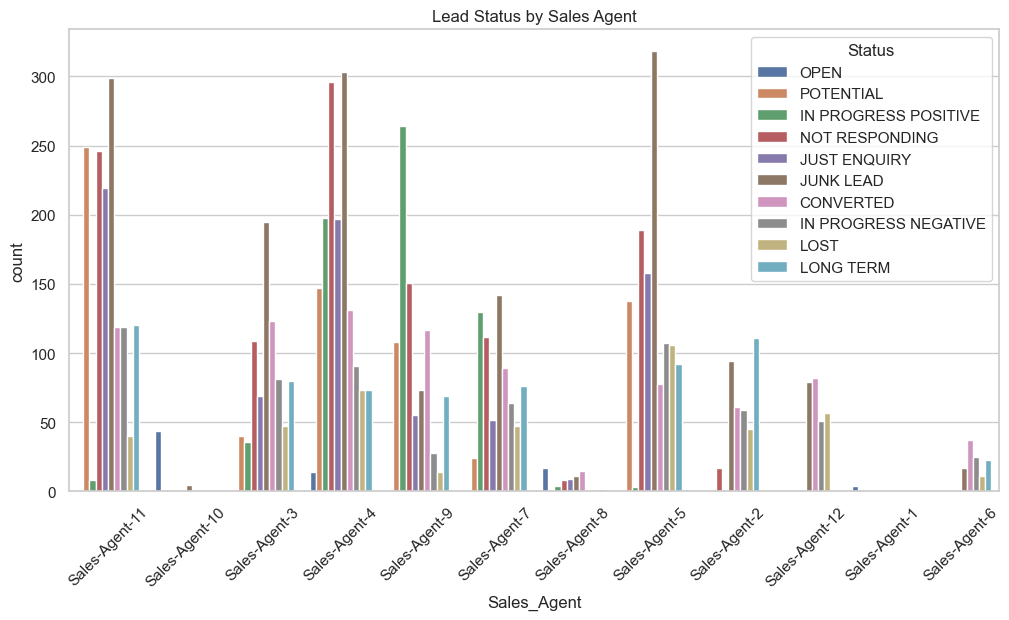

In [26]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Sales_Agent', hue='Status')
plt.title('Lead Status by Sales Agent')
plt.xticks(rotation=45)
plt.show()

- Sales-Agent-5 has the highest number of Junk Leads, indicating possible lead quality
- Sales-Agent-9 stands out in In Progress Positive leads, suggesting high conversion potential. 
- Converted leads are well distributed among Sales-Agent-4, 9, and 11, showing effective closure rates. 
- (" Investigate  Sales-Agent-5 has such a high "Junk Lead" count ")

## Delivery_mode and Status 

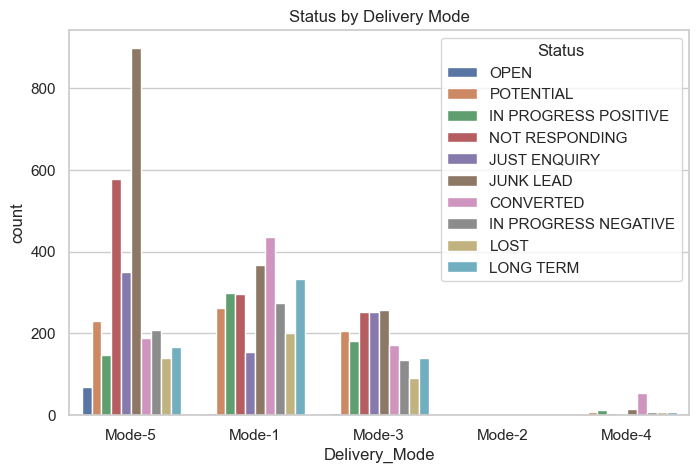

In [27]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Delivery_Mode', hue='Status')
plt.title('Status by Delivery Mode')
plt.show()


- Mode-5 has the most leads, but many are Junk Leads and Not Responding.
- Mode-1 shows a good mix, with more Converted and Long Term leads.
- Mode-3 has balanced lead statuses.
- Mode-2 and Mode-4 have very few leads and low activity.

## Source and Status

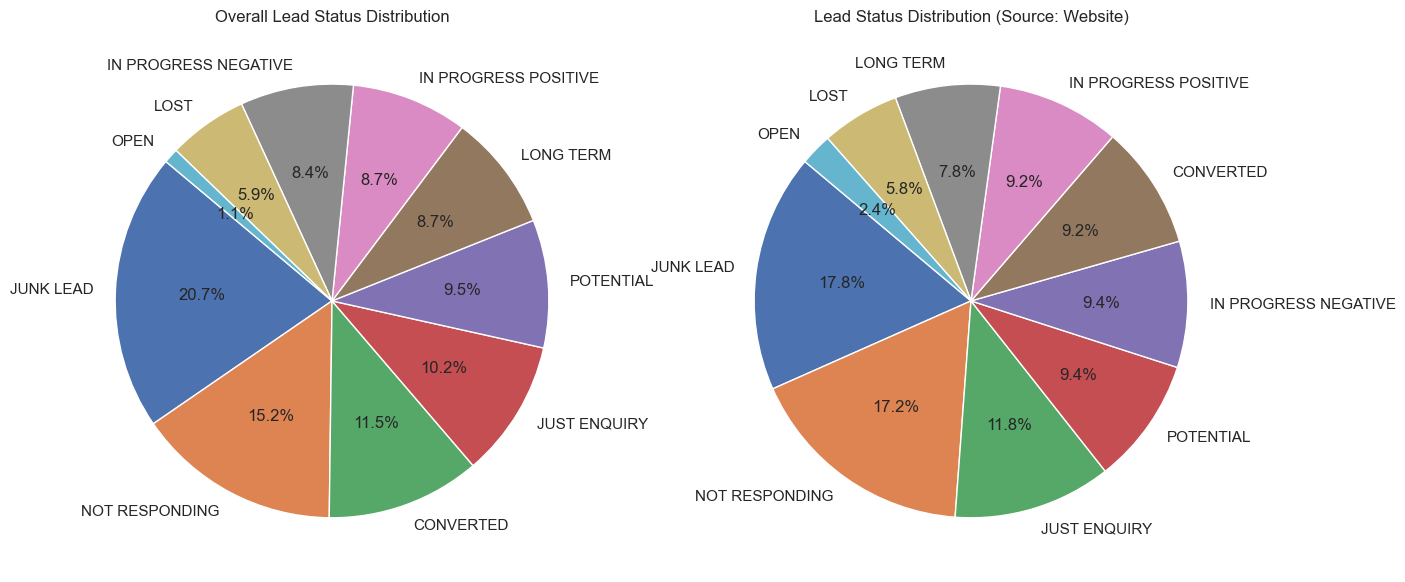

In [28]:
import matplotlib.pyplot as plt

# Overall Status Distribution
status_counts = df['Status'].value_counts()

# Status Distribution for Source = 'Website' (you can change this)
website_status_counts = df[df['Source'] == 'Website']['Status'].value_counts()

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart 1 - Overall
axs[0].pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title('Overall Lead Status Distribution')

# Pie chart 2 - For Website Source
axs[1].pie(website_status_counts, labels=website_status_counts.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title('Lead Status Distribution (Source: Website)')

plt.tight_layout()
plt.show()

- Most common status is Junk Lead (20.7%) – This means many leads are not useful or not a good match.
- Second most common is Not Responding (15.2%) – Many people are not replying.
- Other important groups are Converted (11.5%) and Just Enquiry (10.2%) – Some people have shown interest or already became customers

## Data preprocessing

In [29]:
df.isnull().sum()

Created             0
Product_ID          0
Source              0
Mobile           1810
EMAIL               0
Sales_Agent         0
Location            0
Delivery_Mode       0
Status              0
dtype: int64

In [30]:
df.duplicated().sum()

2

In [31]:
df = df.drop_duplicates()

In [32]:
def simplify_status(status):
    if status in ['CONVERTED', 'converted']:
        return 'Converted'
    elif status in ['Not Responding', 'Junk Lead', 'LOST']:
        return 'Lost'
    elif status in ['Just Enquiry', 'Open', 'Potential', 'In Progress Positive', 'In Progress Negative', 'Long Term',"In Progress"]:
        return 'In Progress'
    else:
        return 'Other'

df['Status'] = df['Status'].apply(simplify_status)

In [33]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Other
1,14-11-2018 09:22,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Other
2,14-11-2018 09:21,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Other
3,14-11-2018 08:46,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Other
4,14-11-2018 07:34,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Other
...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,<NA>,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,Lost
7418,28-04-2018 09:43,15,Call,<NA>,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,Lost
7419,28-04-2018 09:20,5,Live Chat-Direct,<NA>,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Other
7420,28-04-2018 08:04,21,CRM form,<NA>,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Other


In [34]:
df["Status"].value_counts()

Status
Other        6128
Converted     852
Lost          440
Name: count, dtype: int64

In [35]:
# Count source frequencies
source_counts = df['Source'].value_counts()

# Replace infrequent sources with 'Other'
threshold = 50
df['Source_grouped'] = df['Source'].apply(lambda x: x if source_counts[x] >= threshold else 'Other') 

In [36]:
df

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Source_grouped
0,14-11-2018 10:05,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Other,Website
1,14-11-2018 09:22,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Other,Website
2,14-11-2018 09:21,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Other,Website
3,14-11-2018 08:46,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Other,Website
4,14-11-2018 07:34,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Other,Website
...,...,...,...,...,...,...,...,...,...,...
7417,28-04-2018 09:45,9,Call,<NA>,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,Lost,Call
7418,28-04-2018 09:43,15,Call,<NA>,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,Lost,Call
7419,28-04-2018 09:20,5,Live Chat-Direct,<NA>,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Other,Live Chat-Direct
7420,28-04-2018 08:04,21,CRM form,<NA>,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Other,Other


## Handing Date and Time

In [37]:
# Convert 'Created' column to datetime if needed
df['Created'] = pd.to_datetime(df['Created'], errors='coerce')

# Optional: Extract useful parts from datetime
df['Year'] = df['Created'].dt.year
df['Month'] = df['Created'].dt.month
df['Day'] = df['Created'].dt.day
df['Hour'] = df['Created'].dt.hour

# Drop original 'Created' if not needed
df.drop(columns=['Created'], inplace=True)

In [38]:
# Define time bins for hour categories
def categorize_hour(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

# Apply function to Hour column
df['hour_category'] = df['Hour'].apply(categorize_hour)

In [39]:
df

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Source_grouped,Year,Month,Day,Hour,hour_category
0,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Other,Website,2018,11,14,10,morning
1,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Other,Website,2018,11,14,9,morning
2,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Other,Website,2018,11,14,9,morning
3,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Other,Website,2018,11,14,8,morning
4,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Other,Website,2018,11,14,7,morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,<NA>,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,Lost,Call,2018,4,28,9,morning
7418,15,Call,<NA>,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,Lost,Call,2018,4,28,9,morning
7419,5,Live Chat-Direct,<NA>,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Other,Live Chat-Direct,2018,4,28,9,morning
7420,21,CRM form,<NA>,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Other,Other,2018,4,28,8,morning


## Data Transformation

In [40]:
df.select_dtypes(include=['object'])

,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status,Source_grouped,hour_category
0,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,Other Locations,Mode-5,Other,Website,morning
1,18,Website,XXXXXXX,#VALUE!,Sales-Agent-10,Other Locations,Mode-5,Other,Website,morning
2,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,Other Locations,Mode-5,Other,Website,morning
3,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Other,Website,morning
4,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,Other Locations,Mode-5,Other,Website,morning
...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,<NA>,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,Lost,Call,morning
7418,15,Call,<NA>,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,Lost,Call,morning
7419,5,Live Chat-Direct,<NA>,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Other,Live Chat-Direct,morning
7420,21,CRM form,<NA>,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Other,Other,morning


In [41]:
df = pd.get_dummies(df, columns=['Sales_Agent'], prefix='Sales_Agent', drop_first=True)

# Convert boolean dummy columns to integers
dummy_cols = [col for col in df.columns if col.startswith('Sales_Agent_')]
df[dummy_cols] = df[dummy_cols].astype(int)

In [42]:
df

,Product_ID,Source,Mobile,EMAIL,Location,Delivery_Mode,Status,Source_grouped,Year,Month,...,Sales_Agent_Sales-Agent-11,Sales_Agent_Sales-Agent-12,Sales_Agent_Sales-Agent-2,Sales_Agent_Sales-Agent-3,Sales_Agent_Sales-Agent-4,Sales_Agent_Sales-Agent-5,Sales_Agent_Sales-Agent-6,Sales_Agent_Sales-Agent-7,Sales_Agent_Sales-Agent-8,Sales_Agent_Sales-Agent-9
0,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Other Locations,Mode-5,Other,Website,2018,11,...,1,0,0,0,0,0,0,0,0,0
1,18,Website,XXXXXXX,#VALUE!,Other Locations,Mode-5,Other,Website,2018,11,...,0,0,0,0,0,0,0,0,0,0
2,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Other Locations,Mode-5,Other,Website,2018,11,...,0,0,0,0,0,0,0,0,0,0
3,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Other Locations,Mode-5,Other,Website,2018,11,...,0,0,0,0,0,0,0,0,0,0
4,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Other Locations,Mode-5,Other,Website,2018,11,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,<NA>,aXXXXXXX@gmail.com,Mumbai,Mode-4,Lost,Call,2018,4,...,0,0,0,0,0,0,1,0,0,0
7418,15,Call,<NA>,#VALUE!,Other Locations,Mode-5,Lost,Call,2018,4,...,0,1,0,0,0,0,0,0,0,0
7419,5,Live Chat-Direct,<NA>,sXXXXXXX@gmail.com,Bangalore,Mode-1,Other,Live Chat-Direct,2018,4,...,1,0,0,0,0,0,0,0,0,0
7420,21,CRM form,<NA>,YXXXXXXX@gmail.com,Other Locations,Mode-1,Other,Other,2018,4,...,0,0,0,0,1,0,0,0,0,0


In [43]:
df = pd.get_dummies(df, columns=['Delivery_Mode'], prefix='Delivery_Mode', drop_first=True)

# Convert boolean dummy columns to integers
dummy_cols = [col for col in df.columns if col.startswith('Delivery_Mode_')]
df[dummy_cols] = df[dummy_cols].astype(int)

In [44]:
df = pd.get_dummies(df, columns=['hour_category'], prefix='hour_category', drop_first=True)

# Convert boolean dummy columns to integers
dummy_cols = [col for col in df.columns if col.startswith('hour_category_')]
df[dummy_cols] = df[dummy_cols].astype(int)

In [45]:
df = pd.get_dummies(df, columns=['Source_grouped'], prefix='source', drop_first=True)

# Convert boolean dummy columns to integers
dummy_cols = [col for col in df.columns if col.startswith('source_')]
df[dummy_cols] = df[dummy_cols].astype(int)


In [46]:
df

,Product_ID,Source,Mobile,EMAIL,Location,Status,Year,Month,Day,Hour,...,source_Just Dial,source_Live Chat -PPC,source_Live Chat-Blog,source_Live Chat-CPC,source_Live Chat-Direct,source_Live Chat-Google Organic,source_Other,source_Personal Contact,source_US Website,source_Website
0,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Other Locations,Other,2018,11,14,10,...,0,0,0,0,0,0,0,0,0,1
1,18,Website,XXXXXXX,#VALUE!,Other Locations,Other,2018,11,14,9,...,0,0,0,0,0,0,0,0,0,1
2,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Other Locations,Other,2018,11,14,9,...,0,0,0,0,0,0,0,0,0,1
3,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Other Locations,Other,2018,11,14,8,...,0,0,0,0,0,0,0,0,0,1
4,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Other Locations,Other,2018,11,14,7,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7417,9,Call,<NA>,aXXXXXXX@gmail.com,Mumbai,Lost,2018,4,28,9,...,0,0,0,0,0,0,0,0,0,0
7418,15,Call,<NA>,#VALUE!,Other Locations,Lost,2018,4,28,9,...,0,0,0,0,0,0,0,0,0,0
7419,5,Live Chat-Direct,<NA>,sXXXXXXX@gmail.com,Bangalore,Other,2018,4,28,9,...,0,0,0,0,1,0,0,0,0,0
7420,21,CRM form,<NA>,YXXXXXXX@gmail.com,Other Locations,Other,2018,4,28,8,...,0,0,0,0,0,0,1,0,0,0


In [47]:
from sklearn.preprocessing import LabelEncoder
# Label encode Status (target)
le = LabelEncoder()
df["Status"]=le.fit_transform(df['Status'])

In [48]:
df.select_dtypes(include=['object'])

,Product_ID,Source,Mobile,EMAIL,Location
0,18,Website,984XXXXXXX,aXXXXXXX@gmail.com,Other Locations
1,18,Website,XXXXXXX,#VALUE!,Other Locations
2,18,Website,XXXXXXX,dXXXXXXX@yahoo.com,Other Locations
3,18,Website,XXXXXXX,wXXXXXXX@gmail.com,Other Locations
4,18,Website,XXXXXXX,cXXXXXXX@gmail.com,Other Locations
...,...,...,...,...,...
7417,9,Call,<NA>,aXXXXXXX@gmail.com,Mumbai
7418,15,Call,<NA>,#VALUE!,Other Locations
7419,5,Live Chat-Direct,<NA>,sXXXXXXX@gmail.com,Bangalore
7420,21,CRM form,<NA>,YXXXXXXX@gmail.com,Other Locations


In [49]:
df["Product_ID"]=df["Product_ID"].astype(int)

In [50]:
df.select_dtypes(include=['object']).columns

Index(['Source', 'Mobile', 'EMAIL', 'Location'], dtype='object')

In [51]:
# drop unwanted columns
df.drop(['Source', 'Mobile', 'EMAIL', 'Location'],inplace=True,axis=1)

## MODEL BULIDING 
- Split The Data X AND Y 

In [52]:
x=df.drop('Status',axis=1) 
y=df.Status 

In [53]:
x.shape

(7420, 35)

In [54]:
y.shape

(7420,)

## Split the data for training and testing

In [55]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [56]:
x_train.shape


(5194, 35)

In [57]:
y_train.shape

(5194,)

In [58]:
# standard scaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_scaled= scaler.fit_transform(x_train)
x_test_scaled= scaler.transform(x_test)
print(x_train_scaled)
x_train

[[-0.16310775  0.          0.27693175 ... -0.08809632 -0.14223847
  -0.53326533]
 [ 0.33280346  0.         -0.25818116 ... -0.08809632 -0.14223847
  -0.53326533]
 [ 1.82053707  0.         -0.25818116 ... -0.08809632 -0.14223847
  -0.53326533]
 ...
 [-0.16310775  0.         -0.79329408 ... -0.08809632 -0.14223847
  -0.53326533]
 [-1.81614509  0.          1.34715758 ... -0.08809632 -0.14223847
  -0.53326533]
 [-0.16310775  0.         -1.32840699 ... -0.08809632 -0.14223847
  -0.53326533]]


,Product_ID,Year,Month,Day,Hour,Sales_Agent_Sales-Agent-10,Sales_Agent_Sales-Agent-11,Sales_Agent_Sales-Agent-12,Sales_Agent_Sales-Agent-2,Sales_Agent_Sales-Agent-3,...,source_Just Dial,source_Live Chat -PPC,source_Live Chat-Blog,source_Live Chat-CPC,source_Live Chat-Direct,source_Live Chat-Google Organic,source_Other,source_Personal Contact,source_US Website,source_Website
2588,15,2018,8,29,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3662,18,2018,7,31,11,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4556,27,2018,7,6,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
274,19,2018,11,5,15,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2044,9,2018,9,12,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5193,27,2018,6,20,15,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5228,27,2018,6,20,9,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5392,15,2018,6,17,13,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
862,5,2018,10,16,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# smote
from imblearn.over_sampling import SMOTE
# Before SMOTE
print("Before SMOTE:", y_train.value_counts())
smote = SMOTE(random_state=42)

# Apply SMOTE to training data
x_train_smote, y_train_smote = smote.fit_resample(x_train_scaled, y_train)

# After SMOTE
print("After SMOTE:", y_train_smote.value_counts())

Before SMOTE: Status
2    4280
0     620
1     294
Name: count, dtype: int64
After SMOTE: Status
2    4280
0    4280
1    4280
Name: count, dtype: int64


## LogisticRegression

In [60]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report


#Create logisticRegression Instance
lr=LogisticRegression()
lr.fit(x_train_scaled,y_train)

#Accuracy on Train data
x_pred=lr.predict(x_train_scaled)
train_acc=accuracy_score(x_pred,y_train)
print("Accuracy on training data:",train_acc)

#Accuracy on test data
x_test_pred=lr.predict(x_test)

lr_acc=accuracy_score(x_test_pred,y_test)
print("--------------------------------------")
print("The Accuracy of the LogisticRegression is:",lr_acc)
print(confusion_matrix(y_test, x_test_pred))
print(classification_report(y_test,x_test_pred))

Accuracy on training data: 0.8367346938775511
--------------------------------------
The Accuracy of the LogisticRegression is: 0.825696316262354
[[  16    0  216]
 [   8    0  138]
 [  26    0 1822]]
              precision    recall  f1-score   support

           0       0.32      0.07      0.11       232
           1       0.00      0.00      0.00       146
           2       0.84      0.99      0.91      1848

    accuracy                           0.83      2226
   macro avg       0.39      0.35      0.34      2226
weighted avg       0.73      0.83      0.76      2226



### Hyperparameter Tuning (logistic regression)

In [61]:
# Hyperparameter Tuning for Logistic Regression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,accuracy_score

# Define parameter grid for tuning
param_grid_lr = {"C": [0.01, 0.1, 1, 10, 100]}
grid_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5, n_jobs=-1)
grid_lr.fit(x_train_scaled,y_train)

# Get best parameters
best_lr = grid_lr.best_estimator_
print("Best Hyperparameters:", best_lr)

y_pred_best_lr = best_lr.predict(x_test_scaled)

tuned_lr_acc=accuracy_score(y_test, y_pred_best_lr)
print("The Accuracy of the LogisticRegression(tuned) is:",tuned_lr_acc)
print(confusion_matrix(y_test, y_pred_best_lr))
print(classification_report(y_test,y_pred_best_lr))

Best Hyperparameters: LogisticRegression(C=0.01, max_iter=500)
The Accuracy of the LogisticRegression(tuned) is: 0.8373764600179695
[[  35    0  197]
 [   1    0  145]
 [  19    0 1829]]
              precision    recall  f1-score   support

           0       0.64      0.15      0.24       232
           1       0.00      0.00      0.00       146
           2       0.84      0.99      0.91      1848

    accuracy                           0.84      2226
   macro avg       0.49      0.38      0.38      2226
weighted avg       0.77      0.84      0.78      2226



###  RandomForest Classifier

In [62]:
from sklearn.ensemble import RandomForestClassifier

#Create Randomforestclassifier Instance
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train_scaled,y_train)

y_pred_rf=rf_clf.predict(x_test_scaled)
rf_clf_acc=accuracy_score(y_test,y_pred_rf)
print("Accuracy of the RandomForestClassifier is:",rf_clf_acc)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Accuracy of the RandomForestClassifier is: 0.8265947888589398
[[  44    4  184]
 [  10   12  124]
 [  41   23 1784]]
              precision    recall  f1-score   support

           0       0.46      0.19      0.27       232
           1       0.31      0.08      0.13       146
           2       0.85      0.97      0.91      1848

    accuracy                           0.83      2226
   macro avg       0.54      0.41      0.43      2226
weighted avg       0.78      0.83      0.79      2226



 ## Hyperparameter Tuning for RandomForestClassifier

In [63]:
 #Hyperparameter Tuning for RandomForestClassifier

# Define parameter grid for tuning
param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

rf_cv = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
rf_cv.fit(x_train_scaled,y_train)

# Best parameters
rf_best_params =rf_cv.best_params_
print("Best Parameters:",rf_cv.best_params_)

y_predict=rf_cv.predict(x_test_scaled)
tuned_rf_clf_acc=accuracy_score(y_test,y_predict)
print("Accuracy of the RandomForestClassifier(tuned) is:",tuned_rf_clf_acc)
print(confusion_matrix(y_test, y_predict))
print(classification_report(y_test,y_predict))

Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Accuracy of the RandomForestClassifier(tuned) is: 0.8369272237196765
[[  38    1  193]
 [   3    4  139]
 [  20    7 1821]]
              precision    recall  f1-score   support

           0       0.62      0.16      0.26       232
           1       0.33      0.03      0.05       146
           2       0.85      0.99      0.91      1848

    accuracy                           0.84      2226
   macro avg       0.60      0.39      0.41      2226
weighted avg       0.79      0.84      0.79      2226



## DecisionTreeClassifier

In [64]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier(random_state=44)
dt_clf.fit(x_train_scaled, y_train)
y_pred_dt = dt_clf.predict(x_test_scaled)
dt_clf_acc = accuracy_score(y_test, y_pred_dt)
print("Accuracy of the DecisionTreeClassifier is:", dt_clf_acc)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy of the DecisionTreeClassifier is: 0.7165318957771788
[[  70   14  148]
 [  16   20  110]
 [ 213  130 1505]]
              precision    recall  f1-score   support

           0       0.23      0.30      0.26       232
           1       0.12      0.14      0.13       146
           2       0.85      0.81      0.83      1848

    accuracy                           0.72      2226
   macro avg       0.40      0.42      0.41      2226
weighted avg       0.74      0.72      0.73      2226



## Hyperparameter Tuning  DecisionTreeClassifier

In [65]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for tuning
param_grid_dt = {
    "criterion": ["gini", "entropy", "log_loss"],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

# GridSearchCV for DecisionTreeClassifier
dt_cv = GridSearchCV(DecisionTreeClassifier(random_state=44), param_grid_dt, cv=5, n_jobs=-1, verbose=2)
dt_cv.fit(x_train_scaled, y_train)

# Best parameters
dt_best_params = dt_cv.best_params_
print("Best Parameters for DecisionTreeClassifier:", dt_best_params)

# Predictions and evaluation
y_predict_dt = dt_cv.predict(x_test_scaled)
tuned_dt_clf_acc = accuracy_score(y_test, y_predict_dt)
print("Accuracy of the DecisionTreeClassifier (tuned) is:", tuned_dt_clf_acc)
print(confusion_matrix(y_test, y_predict_dt))
print(classification_report(y_test, y_predict_dt))


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for DecisionTreeClassifier: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10}
Accuracy of the DecisionTreeClassifier (tuned) is: 0.8180592991913747
[[  35    4  193]
 [   8    4  134]
 [  48   18 1782]]
              precision    recall  f1-score   support

           0       0.38      0.15      0.22       232
           1       0.15      0.03      0.05       146
           2       0.84      0.96      0.90      1848

    accuracy                           0.82      2226
   macro avg       0.46      0.38      0.39      2226
weighted avg       0.75      0.82      0.77      2226



## support vector machine (SVM)

In [66]:
from sklearn.svm import SVC

#Create SupportVectorClassifier Instance
svc = SVC()
svc.fit(x_train_scaled, y_train)

y_pred_svc = svc.predict(x_test_scaled)
svc_acc=accuracy_score(y_test,y_pred_svc)
print("Accuracy of the SVC is:",svc_acc)
print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test,y_pred_svc))

Accuracy of the SVC is: 0.8351302785265049
[[  36    1  195]
 [   2    3  141]
 [  25    3 1820]]
              precision    recall  f1-score   support

           0       0.57      0.16      0.24       232
           1       0.43      0.02      0.04       146
           2       0.84      0.98      0.91      1848

    accuracy                           0.84      2226
   macro avg       0.61      0.39      0.40      2226
weighted avg       0.79      0.84      0.78      2226



## hyperparameter ("SVM")

In [67]:
# Define parameter grid for tuning
param_grid_svm = {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, n_jobs=-1)
grid_svm.fit(x_train_scaled, y_train)

# Best parameters
svc_best_params =grid_svm.best_params_
print("Best Parameters:",grid_svm.best_params_)

y_pred_best_svc= grid_svm.predict(x_test_scaled)
tuned_svc_acc=accuracy_score(y_test,y_pred_best_svc)
print("Accuracy of the SVC(tuned) is:",tuned_svc_acc)
print(confusion_matrix(y_test, y_pred_best_svc))
print(classification_report(y_test,y_pred_best_svc))

Best Parameters: {'C': 1, 'kernel': 'rbf'}
Accuracy of the SVC(tuned) is: 0.8351302785265049
[[  36    1  195]
 [   2    3  141]
 [  25    3 1820]]
              precision    recall  f1-score   support

           0       0.57      0.16      0.24       232
           1       0.43      0.02      0.04       146
           2       0.84      0.98      0.91      1848

    accuracy                           0.84      2226
   macro avg       0.61      0.39      0.40      2226
weighted avg       0.79      0.84      0.78      2226



###  GradientBoostingClassifier

In [68]:
###  GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier

#Create GradientBoostingClassifier Instance
gbc = GradientBoostingClassifier()
gbc.fit(x_train,y_train)

y_pred_gbc = gbc.predict(x_test)
gbc_acc=accuracy_score(y_test,y_pred_gbc)
print("Accuracy Score of Gradient Boosting classifier is",gbc_acc)
print(confusion_matrix(y_test, y_pred_gbc))
print(classification_report(y_test,y_pred_gbc))

Accuracy Score of Gradient Boosting classifier is 0.8351302785265049
[[  42    1  189]
 [   5    4  137]
 [  29    6 1813]]
              precision    recall  f1-score   support

           0       0.55      0.18      0.27       232
           1       0.36      0.03      0.05       146
           2       0.85      0.98      0.91      1848

    accuracy                           0.84      2226
   macro avg       0.59      0.40      0.41      2226
weighted avg       0.79      0.84      0.79      2226



## Hyperparameter(GradientBoostingClassifier)

In [69]:
# Define parameter grid for tuning
param_grid_gbc = {"n_estimators": [50, 100, 200], "learning_rate": [0.01, 0.1, 0.2]}
grid_gbc = GridSearchCV(GradientBoostingClassifier(), param_grid_gbc, cv=5, n_jobs=-1)
grid_gbc.fit(x_train_scaled, y_train)

# Best parameters
gbc_best_params =grid_gbc.best_params_
print("Best Parameters:",grid_gbc.best_params_)

y_pred_best_gbc = grid_gbc.predict(x_test_scaled)
tuned_gbc_acc=accuracy_score(y_test,y_pred_best_gbc)
print("Accuracy Score of Gradient Boosting classifier(tuned) is",tuned_gbc_acc)
print(confusion_matrix(y_test, y_pred_best_gbc))
print(classification_report(y_test,y_pred_best_gbc))

Best Parameters: {'learning_rate': 0.01, 'n_estimators': 200}
Accuracy Score of Gradient Boosting classifier(tuned) is 0.8355795148247979
[[  30    1  201]
 [   1    5  140]
 [  18    5 1825]]
              precision    recall  f1-score   support

           0       0.61      0.13      0.21       232
           1       0.45      0.03      0.06       146
           2       0.84      0.99      0.91      1848

    accuracy                           0.84      2226
   macro avg       0.64      0.38      0.40      2226
weighted avg       0.79      0.84      0.78      2226



In [70]:
models = pd.DataFrame({"MODEL" : ["Logistic Regression","Hyperparameter logistic regression","Random Forest Classifier","Hyperparameter RandomForestClassifier","DecisionTreeClassifier","Hyperparameter DecisionTree Classifier",
                                  "support vector machine (SVM)","Hyperparameter SVM","GradientBoostingClassifier","Hyperparameter(GradientBoostingClassifier)"],
                       "ACCURACY_SCORE": [lr_acc,tuned_lr_acc,rf_clf_acc,tuned_rf_clf_acc,dt_clf_acc,tuned_dt_clf_acc,svc_acc,tuned_svc_acc,gbc_acc,tuned_gbc_acc]})
models = models.sort_values(by="ACCURACY_SCORE", ascending=False).reset_index(drop=True)
styled_models = models.style.background_gradient(cmap="Blues").format({"ACCURACY_SCORE": "{:.2%}"})
styled_models

,MODEL,ACCURACY_SCORE
0,Hyperparameter logistic regression,83.74%
1,Hyperparameter RandomForestClassifier,83.69%
2,Hyperparameter(GradientBoostingClassifier),83.56%
3,support vector machine (SVM),83.51%
4,Hyperparameter SVM,83.51%
5,GradientBoostingClassifier,83.51%
6,Random Forest Classifier,82.66%
7,Logistic Regression,82.57%
8,Hyperparameter DecisionTree Classifier,81.81%
9,DecisionTreeClassifier,71.65%


## Conclusion
- The best-performing model was Hyperparameter Logistic Regression with an accuracy of 83.74%, closely followed by tuned Random Forest and SVM models. The consistency of high accuracy across tuned models suggests that proper hyperparameter optimization plays a significant role in boosting model performance. Simpler models like Logistic Regression offer competitive performance with lower complexity, making them a strong choice for deployment